# CAB420, Practical 5, Question 1 Template
## Fine-Tuning DCNNs. 
The Kuzushiji-MNIST-49 database, or K-MNIST-49, is a MNIST like database, though with a substantially larger number of classes. However while the number of classes and the variety within them is increased over MNIST, the characteristics of the images are largely the same, i.e. the database is made up of 28x28 pixel grey scale images, where pixel values are often close to 0 or 1 (i.e. black or white). Given this, a model trained on MNIST is likely to adapt well when fine-tuned on K-MNIST-49.

Using a model that has been trained on MNIST and the K-MNIST-49 dataset:
* Modify the network to classify 49 classes rather than the original 10;
* Fine-tune the network and assess the model’s performance. Consider how it compares to the models trained from scratch in the previous week's practical.

### Relevant Examples

The sixth DCNN example, ``CAB420_DCNNs_Example_6_Fine_Tuning_and_Data_Augmentation.ipynb`` is a good starting point, and deals with fine-tuning.

The two "Lots of" scripts, ``CAB420_DCNN_Models_Additional_Script_Lots_of_ResNet_Models.ipynb`` and ``CAB420_DCNN_Models_Additional_Script_Lots_of_VGG_Like_Models.ipynb`` produce lots of pre-trained models that you can use. Saved models that result for both of theses scripts are up on blackboard.

### Suggested Packages

Once again it's tensor flow and keras here. sklearn and matplotlib provide some supporting functionality.

In [1]:
import os
# why is this here? This is disabling some tensorflow warning I get in some of my environments that 
# annoy me (look ugly and untidy really)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import keras
from keras import layers
from keras.utils import to_categorical

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# function to compute class weights
from sklearn.utils import compute_class_weight

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.io
import numpy

### Step 1: The Data

KMINIST-49 again, using the same code to load as we've done previously.

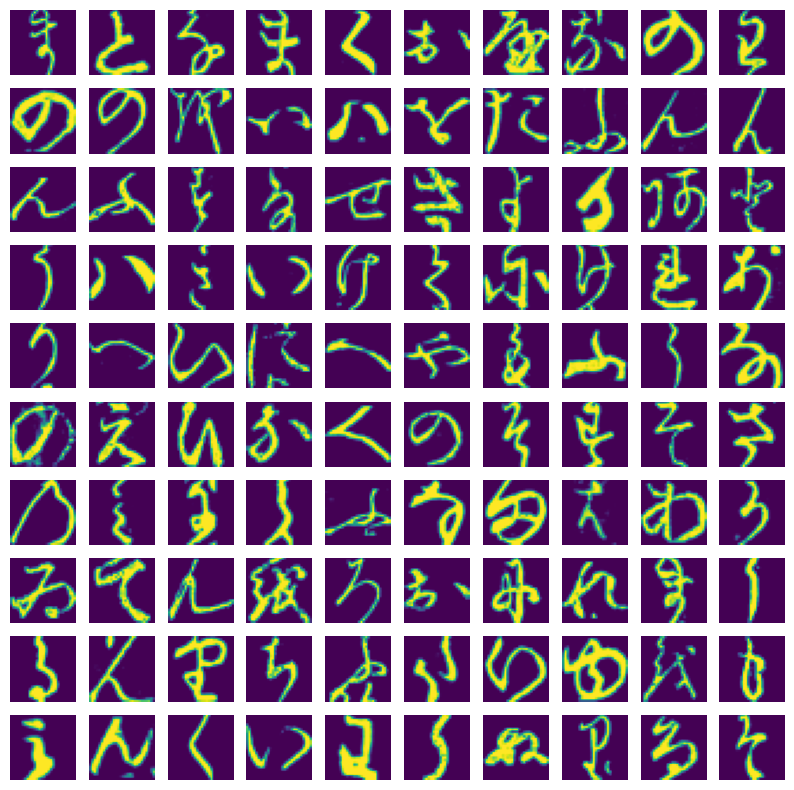

In [2]:
kmnist_train = scipy.io.loadmat('kmnist49_train.mat')
kmnist_test = scipy.io.loadmat('kmnist49_test.mat')
train = numpy.transpose(kmnist_train['imgs'], (2, 0, 1)).reshape(-1, 28, 28, 1)
train_y = to_categorical(kmnist_train['labels'], 49)
test = numpy.transpose(kmnist_test['imgs'], (2, 0, 1)).reshape(-1, 28, 28, 1)
test_y = to_categorical(kmnist_test['labels'], 49)

fig = plt.figure(figsize=[10, 10])
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1)
    ax.imshow(train[i,:,:,0])
    ax.axis('off')

In [3]:
print(train.shape)

(232365, 28, 28, 1)


<BarContainer object of 49 artists>

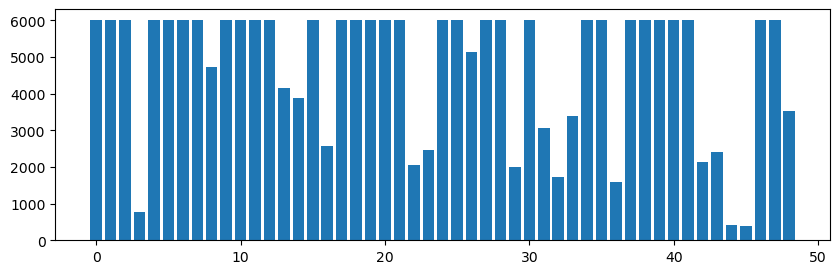

In [4]:
unique, counts = numpy.unique(kmnist_train['labels'], return_counts=True)
fig = plt.figure(figsize=[10, 3])
ax = fig.add_subplot(1, 1, 1)
ax.bar(range(49), counts)

### Step 2: Fine Tuning

You can tune any model you choose. 

These models all come from the pre-trained set available on blackboard (week 5 additional resources). We recommend a simple network so you don't have to wait too long for things to train, but feel free to play with different networks and see how things vary.

You will need to change the below path to a model of your chosing.

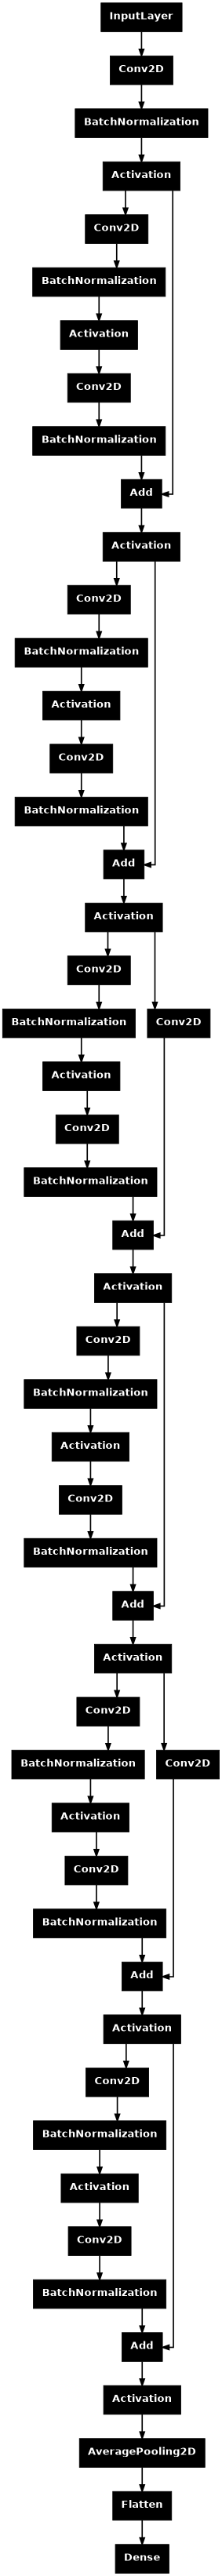

In [5]:
model_resnet = keras.models.load_model('../../cab420_examples/models/resnet_v1_FashionMNIST_medium.keras')
keras.utils.plot_model(model_resnet, dpi=60)

You could chose to work off either a VGG-Like or ResNet model here. I'd encourage you to try both.

In [6]:
#model_vgg = keras.models.load_model('../../cab420_examples/models/resnet_v1_MNIST_medium.keras')
#model_vgg.summary()

### Step 3: Modify the Network

You now need to swap out the last layer to change the number of outputs for your chosen model. You can optionally set different layers to be fixed - this is a good thing to experiment with.

In [7]:
print(model_resnet.layers[-2])

<Flatten name=flatten, built=True>


In [8]:
outputs = layers.Dense(49, activation='softmax')(model_resnet.layers[-2].output) #activation = softmax because its output layer and classification task.

new_model = keras.Model(inputs=model_resnet.input, outputs=outputs)
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ img (InputLayer)    │ (None, 28, 28, 1) │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 28, 28, 8) │         80 │ img[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 28, 28, 8) │         32 │ conv2d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 28, 28, 8) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 28, 28, 8) │        584 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28, 8) │         32 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 28, 28, 8) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28, 8) │        584 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28, 8) │         32 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 28, 28, 8) │          0 │ activation[0][0], │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 28, 28, 8) │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 28, 28, 8) │        584 │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28, 8) │         32 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 28, 28, 8) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 28, 28, 8) │        584 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28, 8) │         32 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 28, 28, 8) │          0 │ activation_2[0][… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 28, 28, 8) │          0 │ add_1[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 14, 14,    │      1,168 │ activation_4[0][

 Total params: 46,161 (180.32 KB)

 Trainable params: 45,697 (178.50 KB)

 Non-trainable params: 464 (1.81 KB)

### Step 4: Network Training and Evaluation

You now need to train the network with the KMNIST data.

An eval function is provided below. This is slightly different from last week, just to mix it up.

In [9]:
def eval_model(model, history, x_train, y_train, x_test, y_test):

    fig = plt.figure(figsize=[20, 20])    

    ax = fig.add_subplot(1, 1, 1)    
    pred = model.predict(x_test);
    indexes = keras.ops.argmax(pred, axis=1)
    gt_idx = keras.ops.argmax(y_test, axis=1)

    confusion_mtx = confusion_matrix(gt_idx, indexes) 
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mtx, xticklabels=range(49), yticklabels=range(49), 
            annot=True, fmt='g', ax=ax)

    fig = plt.figure(figsize=[10, 5])    

    ax = fig.add_subplot(1, 1, 1)    
    ax.plot(history['loss'], label='Loss')
    ax.plot(history['val_loss'], label='Validation Loss')
    ax.plot(history['accuracy'], label='Accuracy')
    ax.plot(history['val_accuracy'], label='Validation Accuracy')
    ax.legend()

    print(classification_report(gt_idx, indexes))

In [10]:
# Freeze the layers except the last 2 layers, which we just added
for layer in new_model.layers[:-1]:
    layer.trainable = False
    
# Check the trainable status of the individual layers
for layer in new_model.layers:
    print(layer, layer.trainable)

<InputLayer name=img, built=True> False
<Conv2D name=conv2d, built=True> False
<BatchNormalization name=batch_normalization, built=True> False
<Activation name=activation, built=True> False
<Conv2D name=conv2d_1, built=True> False
<BatchNormalization name=batch_normalization_1, built=True> False
<Activation name=activation_1, built=True> False
<Conv2D name=conv2d_2, built=True> False
<BatchNormalization name=batch_normalization_2, built=True> False
<Add name=add, built=True> False
<Activation name=activation_2, built=True> False
<Conv2D name=conv2d_3, built=True> False
<BatchNormalization name=batch_normalization_3, built=True> False
<Activation name=activation_3, built=True> False
<Conv2D name=conv2d_4, built=True> False
<BatchNormalization name=batch_normalization_4, built=True> False
<Add name=add_1, built=True> False
<Activation name=activation_4, built=True> False
<Conv2D name=conv2d_5, built=True> False
<BatchNormalization name=batch_normalization_5, built=True> False
<Activation

In [11]:
from sklearn.utils import class_weight

class_weight = class_weight.compute_class_weight(class_weight = 'balanced', classes = numpy.unique(kmnist_train['labels']), \
                                                 y = kmnist_train['labels'].reshape(-1))

class_weight_dict = {}
for i in range(49):
    class_weight_dict[i] = class_weight[i]
print(class_weight_dict)

{0: 0.7903571428571429, 1: 0.7903571428571429, 2: 0.7903571428571429, 3: 6.103143960286817, 4: 0.7903571428571429, 5: 0.7903571428571429, 6: 0.7903571428571429, 7: 0.7903571428571429, 8: 1.005970058791442, 9: 0.7903571428571429, 10: 0.7903571428571429, 11: 0.7903571428571429, 12: 0.7903571428571429, 13: 1.1385697135997257, 14: 1.2263105397317966, 15: 0.7903571428571429, 16: 1.8487886382623224, 17: 0.7903571428571429, 18: 0.7903571428571429, 19: 0.7903571428571429, 20: 0.7903571428571429, 21: 0.7903571428571429, 22: 2.2986635274565472, 23: 1.934778807483826, 24: 0.7903571428571429, 25: 0.7903571428571429, 26: 0.9240340719296292, 27: 0.7903571428571429, 28: 0.7903571428571429, 29: 2.3793993262131745, 30: 0.7903571428571429, 31: 1.5497198879551821, 32: 2.7602694162647596, 33: 1.3972135701658388, 34: 0.7903571428571429, 35: 0.7903571428571429, 36: 2.967548721616306, 37: 0.7903571428571429, 38: 0.7903571428571429, 39: 0.7903571428571429, 40: 0.7903571428571429, 41: 0.7903571428571429, 42: 2

In [12]:
# train the model
new_model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer=keras.optimizers.Adam(), jit_compile=False)
history = new_model.fit(train, train_y,
                    batch_size=256,
                    epochs=5,
                    validation_data=(test, test_y), class_weight=class_weight_dict)

Epoch 1/5
908/908 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.0731 - loss: 4.0892 - val_accuracy: 0.1691 - val_loss: 3.3697
Epoch 2/5
908/908 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.2500 - loss: 3.1160 - val_accuracy: 0.2142 - val_loss: 3.2240
Epoch 3/5
908/908 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.2970 - loss: 2.8867 - val_accuracy: 0.2458 - val_loss: 3.1156
Epoch 4/5
908/908 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3175 - loss: 2.7930 - val_accuracy: 0.2527 - val_loss: 3.0851
Epoch 5/5
908/908 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3343 - loss: 2.6969 - val_accuracy: 0.2587 - val_loss: 3.0565


1205/1205 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
              precision    recall  f1-score   support

           0       0.19      0.20      0.20      1000
           1       0.38      0.39      0.39      1000
           2       0.40      0.66      0.50      1000
           3       0.03      0.37      0.06       126
           4       0.36      0.25      0.30      1000
           5       0.30      0.12      0.17      1000
           6       0.29      0.26      0.27      1000
           7       0.34      0.42      0.38      1000
           8       0.19      0.13      0.15       767
           9       0.42      0.25      0.32      1000
          10       0.38      0.36      0.37      1000
          11       0.31      0.50      0.38      1000
          12       0.23      0.10      0.14      1000
          13       0.22      0.28      0.25       678
          14       0.16      0.21      0.19       629
          15       0.29      0.08      0.13      1000
          16       0.23      0.41     

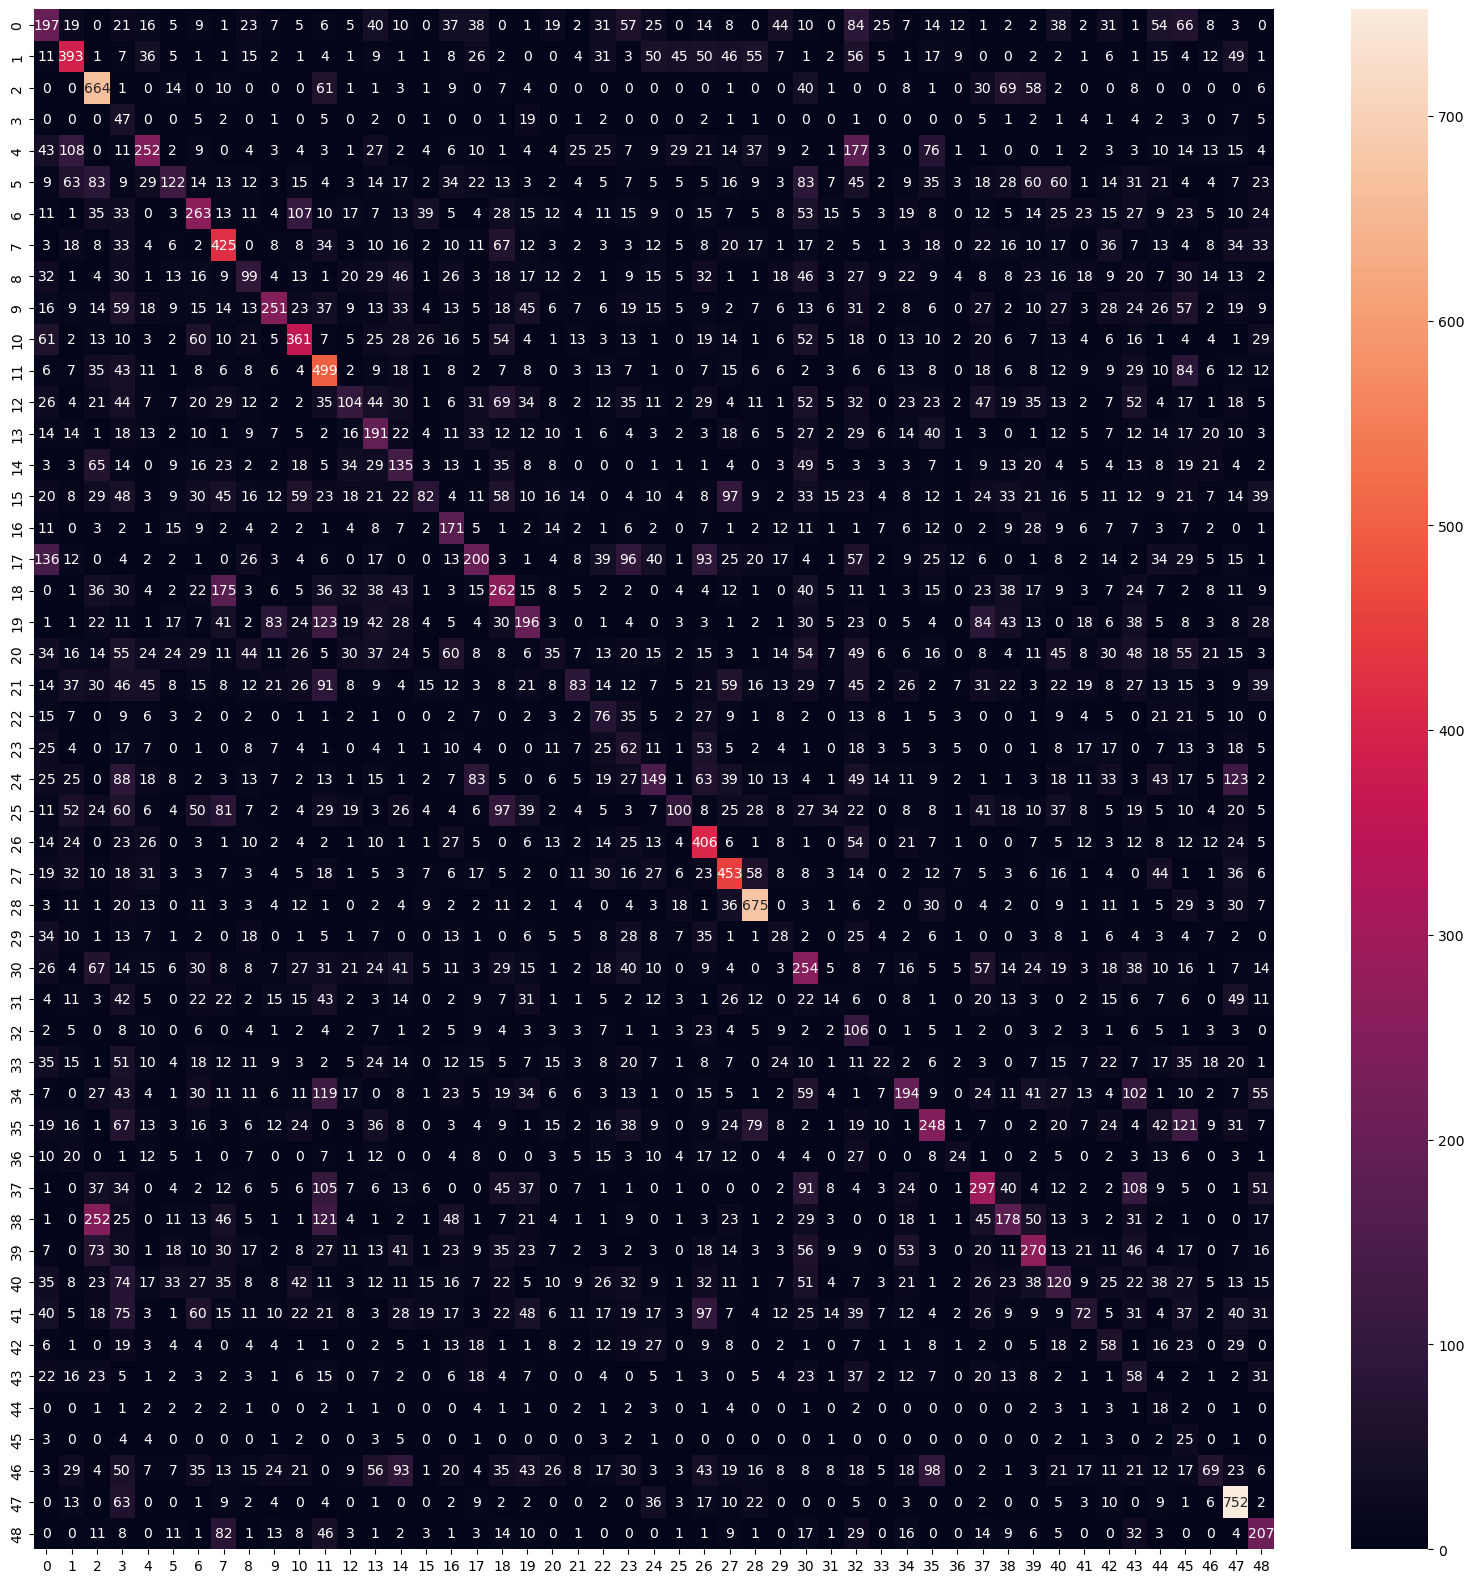

<Figure size 1000x800 with 0 Axes>

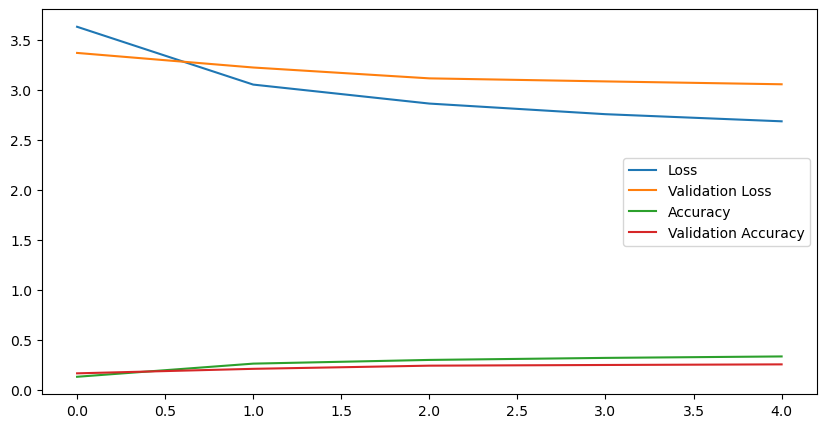

In [13]:
eval_model(new_model, history.history, train, train_y, test, test_y)

In [14]:
# Freeze the layers except the last 2 layers, which we just added
for layer in new_model.layers:
    layer.trainable = True
    
# Check the trainable status of the individual layers
for layer in new_model.layers:
    print(layer, layer.trainable)

<InputLayer name=img, built=True> True
<Conv2D name=conv2d, built=True> True
<BatchNormalization name=batch_normalization, built=True> True
<Activation name=activation, built=True> True
<Conv2D name=conv2d_1, built=True> True
<BatchNormalization name=batch_normalization_1, built=True> True
<Activation name=activation_1, built=True> True
<Conv2D name=conv2d_2, built=True> True
<BatchNormalization name=batch_normalization_2, built=True> True
<Add name=add, built=True> True
<Activation name=activation_2, built=True> True
<Conv2D name=conv2d_3, built=True> True
<BatchNormalization name=batch_normalization_3, built=True> True
<Activation name=activation_3, built=True> True
<Conv2D name=conv2d_4, built=True> True
<BatchNormalization name=batch_normalization_4, built=True> True
<Add name=add_1, built=True> True
<Activation name=activation_4, built=True> True
<Conv2D name=conv2d_5, built=True> True
<BatchNormalization name=batch_normalization_5, built=True> True
<Activation name=activation_5, 

In [17]:
# train the model
new_model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer=keras.optimizers.Adam(0.001), jit_compile=False)
history = new_model.fit(train, train_y,
                    batch_size=256,
                    epochs=20,
                    validation_data=(test, test_y), class_weight=class_weight_dict,
                       callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)])

Epoch 1/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 46s 46ms/step - accuracy: 0.9577 - loss: 0.1979 - val_accuracy: 0.8500 - val_loss: 0.6394
Epoch 2/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.9589 - loss: 0.1933 - val_accuracy: 0.8586 - val_loss: 0.6269
Epoch 3/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.9620 - loss: 0.1829 - val_accuracy: 0.8497 - val_loss: 0.6646
Epoch 4/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.9634 - loss: 0.1780 - val_accuracy: 0.8690 - val_loss: 0.5690
Epoch 5/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.9643 - loss: 0.1752 - val_accuracy: 0.8617 - val_loss: 0.6126
Epoch 6/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.9666 - loss: 0.1653 - val_accuracy: 0.8359 - val_loss: 0.7041
Epoch 7/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.9663 - loss: 0.1652 - val_accuracy: 0.8804 - val_loss: 0.5266
Epoch 8/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.9669 - loss: 0.1637 - 

1205/1205 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1000
           1       0.94      0.97      0.95      1000
           2       0.91      0.94      0.93      1000
           3       0.54      0.98      0.70       126
           4       0.98      0.80      0.88      1000
           5       0.97      0.69      0.80      1000
           6       0.95      0.83      0.88      1000
           7       0.92      0.86      0.89      1000
           8       0.71      0.93      0.81       767
           9       0.97      0.79      0.87      1000
          10       0.99      0.75      0.85      1000
          11       0.97      0.85      0.91      1000
          12       0.83      0.87      0.85      1000
          13       0.97      0.74      0.84       678
          14       0.93      0.84      0.88       629
          15       0.82      0.92      0.87      1000
          16       1.00      0.89     

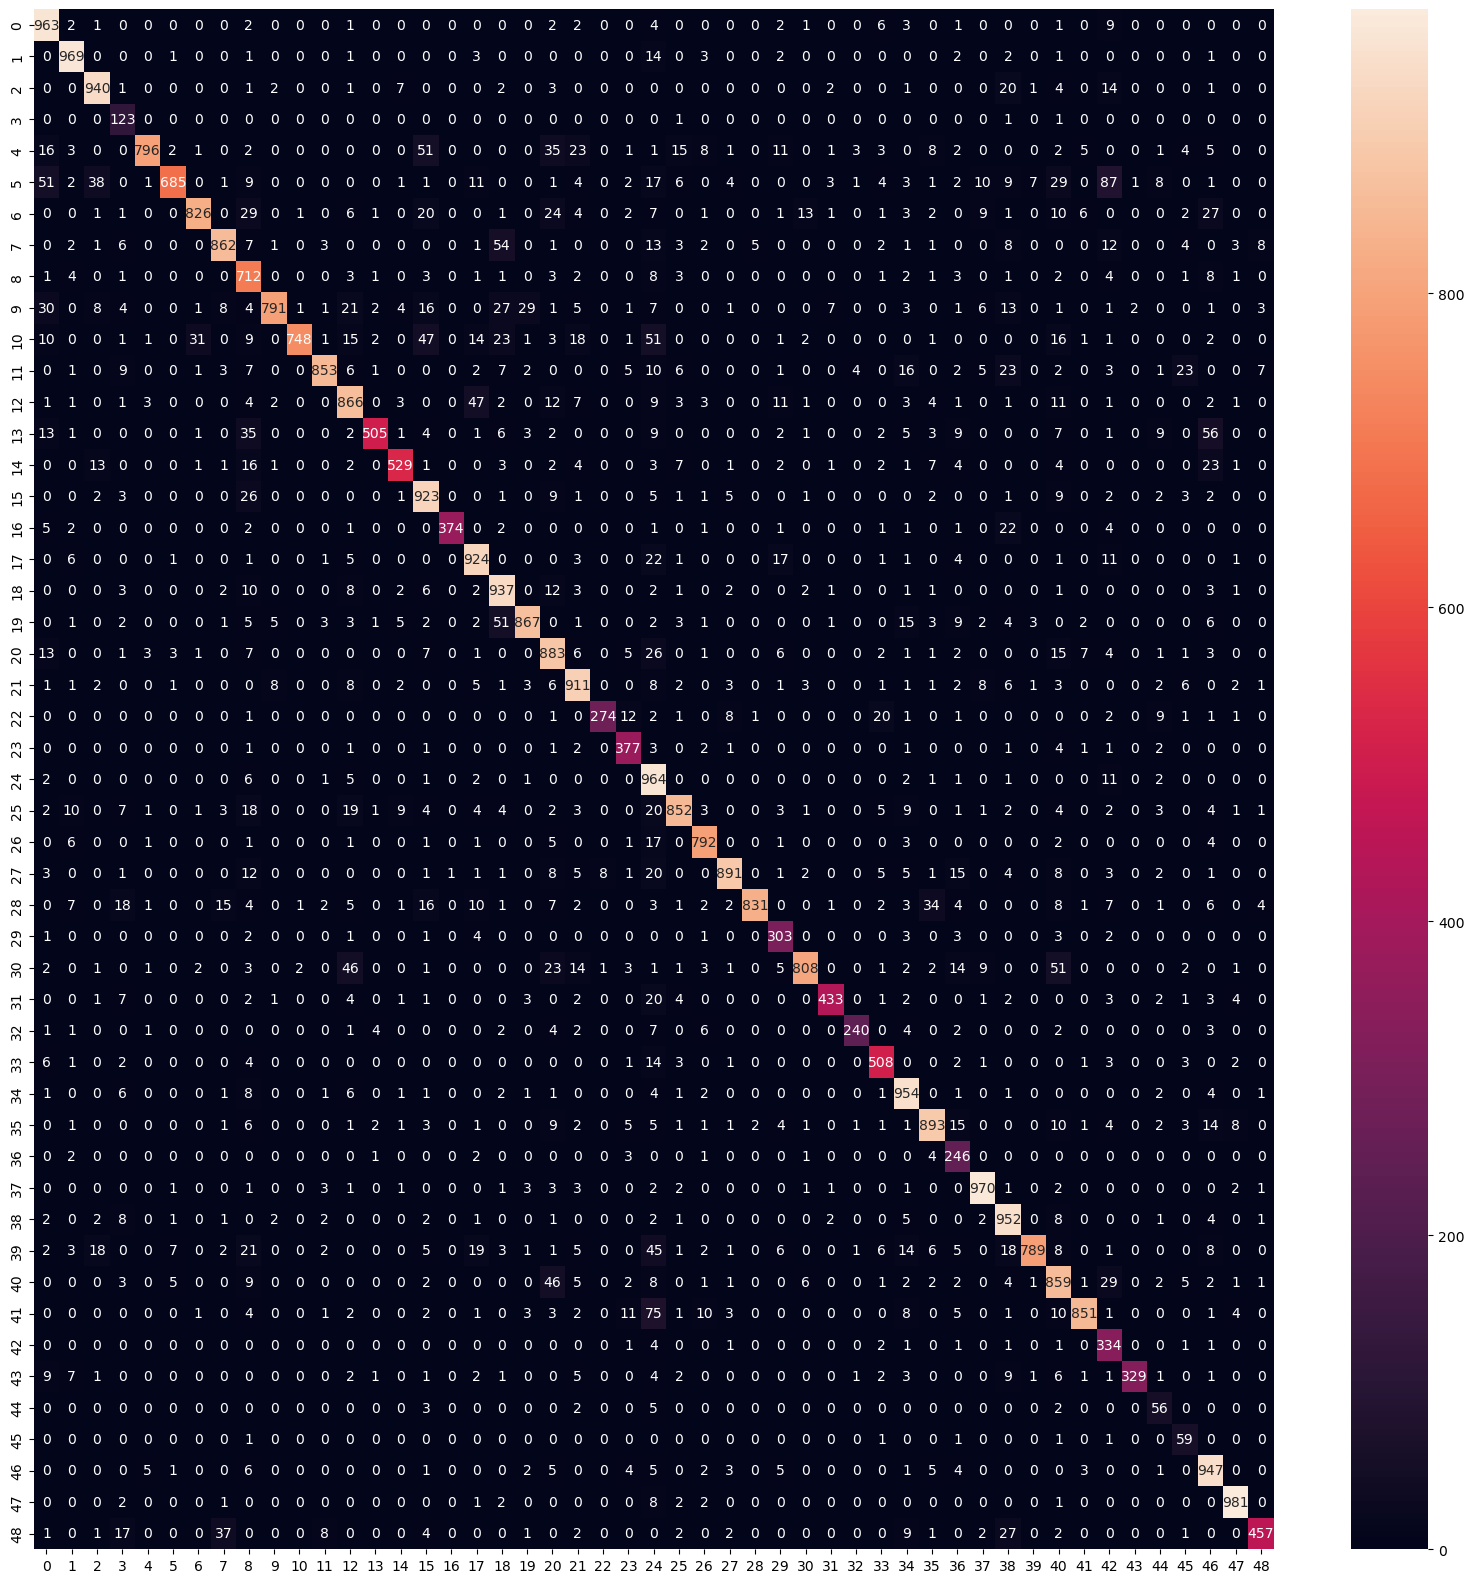

<Figure size 1000x800 with 0 Axes>

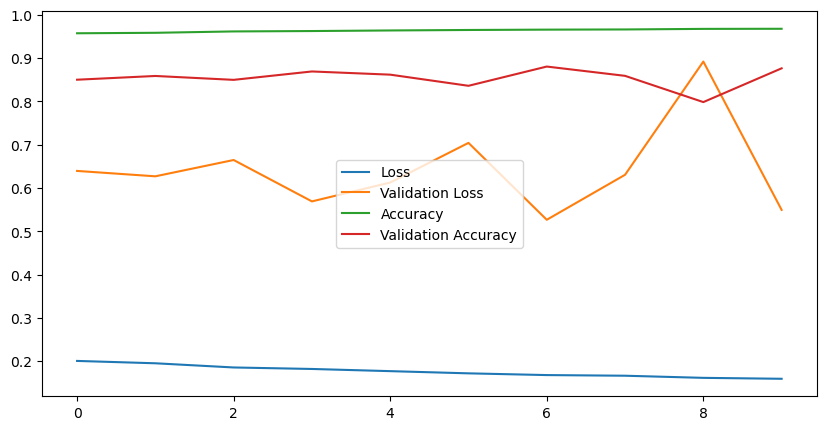

In [18]:
eval_model(new_model, history.history, train, train_y, test, test_y)